# Zurich Population Analysis
Order of execution: 3.<br>
This script needs to be run after the MigrosChallengeDataPreparation and Stores_Analysis

In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [29]:
Pop_by_kreis_age_grp_gend_nat = pd.read_csv("Zurich_Stadt_Data\Population_by_kreis_age_group_gender_nationality.csv")
Pop_by_kreis_age_grp_gend_nat

,StichtagDatJahr,StichtagDatMM,StichtagDatMonat,StichtagDat,SexCd,SexLang,AlterV20Sort,AlterV20Kurz,HerkunftCd,HerkunftLang,KreisCd,KreisLang,QuarCd,QuarLang,DatenstandCd,DatenstandLang,AnzBestWir
0,1998,1,Januar,13910,1,männlich,1,0-19,1,Schweizer/in,1,Kreis 1,11,Rathaus,V,Veröffentlicht,114
1,1998,1,Januar,13910,1,männlich,1,0-19,1,Schweizer/in,1,Kreis 1,12,Hochschulen,V,Veröffentlicht,24
2,1998,1,Januar,13910,1,männlich,1,0-19,1,Schweizer/in,1,Kreis 1,13,Lindenhof,V,Veröffentlicht,37
3,1998,1,Januar,13910,1,männlich,1,0-19,1,Schweizer/in,1,Kreis 1,14,City,V,Veröffentlicht,48
4,1998,1,Januar,13910,1,männlich,1,0-19,1,Schweizer/in,2,Kreis 2,21,Wollishofen,V,Veröffentlicht,950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183730,2020,7,Juli,22127,2,weiblich,5,80 u. älter,2,Ausländer/in,11,Kreis 11,115,Oerlikon,P,Provisorisch,65
183731,2020,7,Juli,22127,2,weiblich,5,80 u. älter,2,Ausländer/in,11,Kreis 11,119,Seebach,P,Provisorisch,82
183732,2020,7,Juli,22127,2,weiblich,5,80 u. älter,2,Ausländer/in,12,Kreis 12,121,Saatlen,P,Provisorisch,18
183733,2020,7,Juli,22127,2,weiblich,5,80 u. älter,2,Ausländer/in,12,Kreis 12,122,Schwamendingen-Mitte,P,Provisorisch,47


In [131]:
# Useful to run them before starting working on the data
# Pop_by_quar_age_grp_gend_nat.dtypes
Pop_by_quar_age_grp_gend_nat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332766 entries, 0 to 332765
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   StichtagDatJahr  332766 non-null  int64 
 1   QuarSort         332766 non-null  int64 
 2   QuarCd           332766 non-null  int64 
 3   QuarLang         332766 non-null  object
 4   AlterVSort       332766 non-null  int64 
 5   AlterVKurz       332766 non-null  int64 
 6   AlterV05Sort     332766 non-null  int64 
 7   AlterV05Kurz     332766 non-null  object
 8   HerkunftLang     332766 non-null  object
 9   HerkunftSort     332766 non-null  int64 
 10  SexCd            332766 non-null  int64 
 11  SexKurz          332766 non-null  object
 12  AnzBestWir       332766 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 33.0+ MB


## Calculate the population statistics at Kreis level

In [132]:
# Retaining data for December only, so we have yearly data
Pop_by_year_kreis = Pop_by_kreis_age_grp_gend_nat[Pop_by_kreis_age_grp_gend_nat['StichtagDatMonat'] == 'Dezember'].groupby(['StichtagDatJahr','KreisCd','KreisLang']).apply(lambda x: pd.Series(dict(
    Swiss=x[x['HerkunftLang'] == 'Schweizer/in']['AnzBestWir'].sum(),
    Foreigners=x[x['HerkunftLang'] == 'Ausländer/in']['AnzBestWir'].sum(),
    Male=x[x['SexLang'] == 'männlich']['AnzBestWir'].sum(),
    Female=x[x['SexLang'] == 'weiblich']['AnzBestWir'].sum(),
    Total=x['AnzBestWir'].sum()
))).reset_index()

# Visualise it
Pop_by_year_kreis

,StichtagDatJahr,KreisCd,KreisLang,Swiss,Foreigners,Male,Female,Total
0,1998,1,Kreis 1,4622,1245,3202,2665,5867
1,1998,2,Kreis 2,22354,6241,13315,15280,28595
2,1998,3,Kreis 3,30910,15112,22380,23642,46022
3,1998,4,Kreis 4,15065,12118,14250,12933,27183
4,1998,5,Kreis 5,6076,4967,6253,4790,11043
...,...,...,...,...,...,...,...,...
259,2019,8,Kreis 8,10868,6192,8218,8842,17060
260,2019,9,Kreis 9,38215,18422,28651,27986,56637
261,2019,10,Kreis 10,30222,10610,20125,20707,40832
262,2019,11,Kreis 11,48022,27782,38553,37251,75804


### Trends in the Total Population Size

(340000.0, 450000.0)

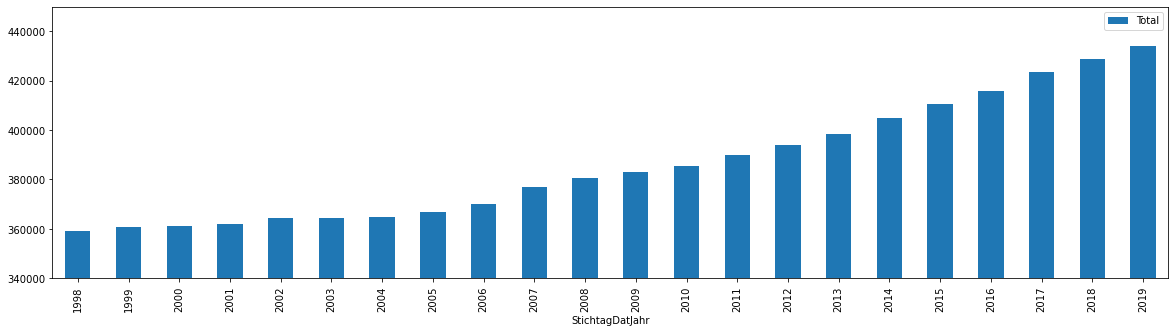

In [133]:
Pop_trends_Bar_Chart = Pop_by_year_kreis.groupby(['StichtagDatJahr']).agg(Total=('Total','sum')).plot.bar(y=['Total'], rot=90, figsize=(20,5))
Pop_trends_Bar_Chart.set_ylim(340000,450000)

#### Trends in the Swiss Population Size

(250000.0, 300000.0)

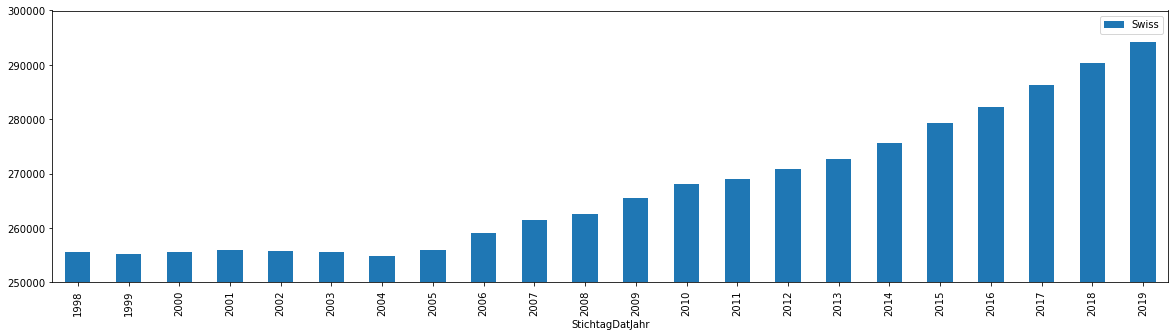

In [134]:
Pop_trends_Bar_Chart = Pop_by_year_kreis.groupby(['StichtagDatJahr']).agg(Swiss=('Swiss','sum')).plot.bar(y=['Swiss'], rot=90, figsize=(20,5))
Pop_trends_Bar_Chart.set_ylim(250000,300000)

#### Trends in the Foreign Population Size

Swiss citizens show an increasing trend.

(90000.0, 150000.0)

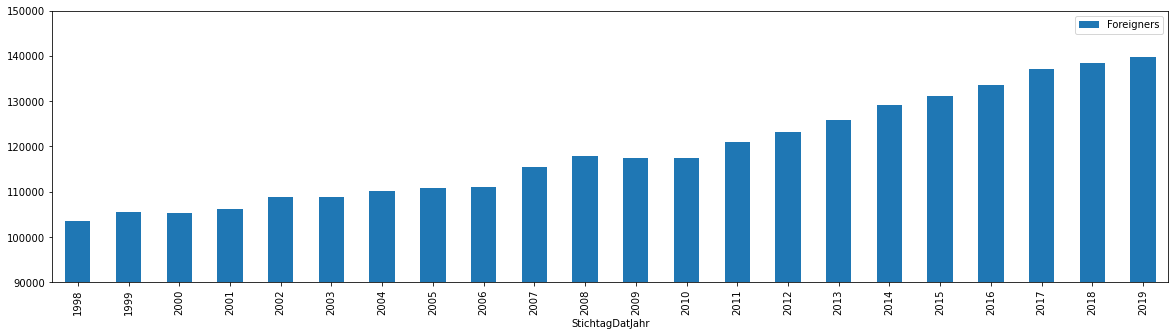

In [135]:
Pop_trends_Bar_Chart = Pop_by_year_kreis.groupby(['StichtagDatJahr']).agg(Foreigners=('Foreigners','sum')).plot.bar(y=['Foreigners'], rot=90, figsize=(20,5))
Pop_trends_Bar_Chart.set_ylim(90000,150000)

#### Trends in the Population Size as a line chart

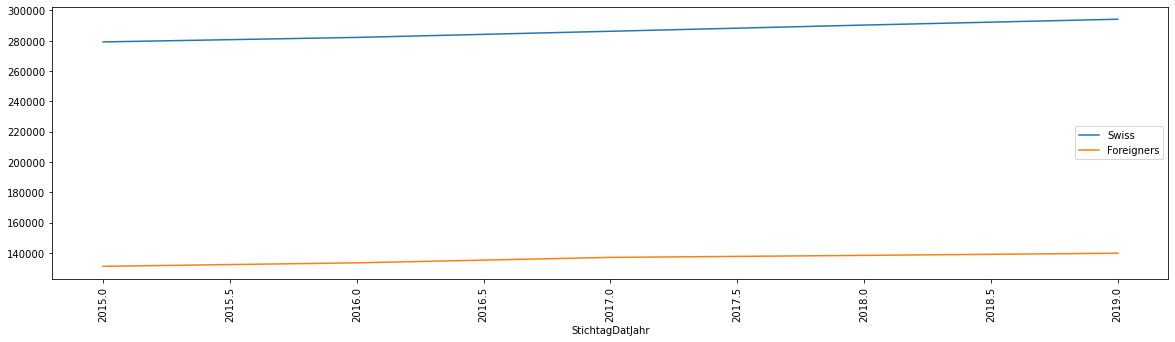

In [129]:
Pop_trends_Line_Chart = Pop_by_year_kreis[(Pop_by_year_kreis['StichtagDatJahr'] >= 2015) & (Pop_by_year_kreis['StichtagDatJahr'] <= 2019)].groupby(['StichtagDatJahr']).agg(Swiss=('Swiss','sum'), Foreigners=('Foreigners','sum')).plot.line(y=['Swiss', 'Foreigners'], rot=90, figsize=(20,5))

Pop_trends_Line_Chart.figure.savefig('Pop_trends_Line_Chart.pdf')

#### Trends in the Swiss Population Size by Kreis

In [136]:
Pop_by_year_PIVOTED_kreis = Pop_by_year_kreis[(Pop_by_year_kreis['StichtagDatJahr'] >= 2015) & (Pop_by_year_kreis['StichtagDatJahr'] <= 2019)].groupby(['StichtagDatJahr']).apply(lambda x: pd.Series(dict(
    Kreis_1=x[x['KreisCd'] == 1]['Total'].sum(),
    Kreis_2=x[x['KreisCd'] == 2]['Total'].sum(),
    Kreis_3=x[x['KreisCd'] == 3]['Total'].sum(),
    Kreis_4=x[x['KreisCd'] == 4]['Total'].sum(),
    Kreis_5=x[x['KreisCd'] == 5]['Total'].sum(),
    Kreis_6=x[x['KreisCd'] == 6]['Total'].sum(),
    Kreis_7=x[x['KreisCd'] == 7]['Total'].sum(),
    Kreis_8=x[x['KreisCd'] == 8]['Total'].sum(),
    Kreis_9=x[x['KreisCd'] == 9]['Total'].sum(),
    Kreis_10=x[x['KreisCd'] == 10]['Total'].sum(),
    Kreis_11=x[x['KreisCd'] == 11]['Total'].sum(),
    Kreis_12=x[x['KreisCd'] == 12]['Total'].sum(),
    Total=x['Total'].sum()
)))

Pop_by_year_PIVOTED_kreis

,Kreis_1,Kreis_2,Kreis_3,Kreis_4,Kreis_5,Kreis_6,Kreis_7,Kreis_8,Kreis_9,Kreis_10,Kreis_11,Kreis_12,Total
StichtagDatJahr,,,,,,,,,,,,,
2015,5617,31603,49195,28701,15065,32867,37053,16192,51328,38199,72831,31753,410404
2016,5648,32162,49500,28630,15423,33270,37139,16213,52898,39564,73413,31822,415682
2017,5728,33593,50042,28775,15666,33614,37458,16541,54716,40341,74809,32027,423310
2018,5750,34877,50569,28729,15579,34321,38191,16788,55765,40341,75344,32483,428737
2019,5791,35035,51122,29368,15750,34794,38584,17060,56637,40832,75804,33231,434008


<AxesSubplot:xlabel='StichtagDatJahr'>

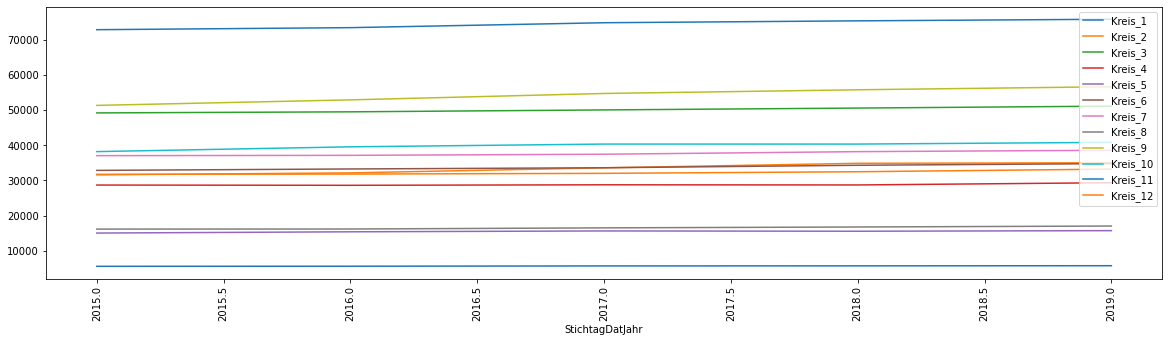

In [92]:
Pop_trends_Bar_Chart = Pop_by_year_PIVOTED_kreis.plot.line(y=['Kreis_1','Kreis_2','Kreis_3','Kreis_4','Kreis_5','Kreis_6','Kreis_7','Kreis_8','Kreis_9','Kreis_10','Kreis_11','Kreis_12'], rot=90, figsize=(20,5))
Pop_trends_Bar_Chart

Pop_trends_Bar_Chart

Kreis 11 has the highest increase in population as well as the highest absolute numbers.
Also Kreis 9 shows a remarkable increase in population size.
It would be good to colour the lines with the highest increase during the years.

### Quantify the population trends over a period of 5 years

In [138]:
# Define the minimum and maximum year
min_year = 2015
max_year = 2019

# Calculate the values at the borders of the timeline being considered
Pop_trends_by_kreis_last_years = Pop_by_year_kreis[(Pop_by_year_kreis['StichtagDatJahr'] >= min_year) & (Pop_by_year_kreis['StichtagDatJahr'] <= max_year)].groupby(['KreisLang']).agg(min_total = ('Total','min'), max_total = ('Total','max'))
Pop_trends_by_kreis_last_years['min_total'] = Pop_by_year_kreis[Pop_by_year_kreis['StichtagDatJahr'] == min_year].groupby(['KreisLang'])['Total'].min()
Pop_trends_by_kreis_last_years['max_total'] = Pop_by_year_kreis[Pop_by_year_kreis['StichtagDatJahr'] == max_year].groupby(['KreisLang'])['Total'].max()

# Calculate the difference between the beginning and the end of the timeline
Pop_trends_by_kreis_last_years['difference'] = Pop_trends_by_kreis_last_years['max_total'] - Pop_trends_by_kreis_last_years['min_total']
Pop_trends_by_kreis_last_years['pop_size_trend%'] = round((Pop_trends_by_kreis_last_years['max_total'] - Pop_trends_by_kreis_last_years['min_total']) / Pop_trends_by_kreis_last_years['min_total'],4) *100

Pop_trends_by_kreis_last_years.sort_values(by = 'pop_size_trend%', ascending = False)

,min_total,max_total,difference,pop_size_trend%
KreisLang,,,,
Kreis 2,31603,35035,3432,10.86
Kreis 9,51328,56637,5309,10.34
Kreis 10,38199,40832,2633,6.89
Kreis 6,32867,34794,1927,5.86
Kreis 8,16192,17060,868,5.36
Kreis 12,31753,33231,1478,4.65
Kreis 5,15065,15750,685,4.55
Kreis 7,37053,38584,1531,4.13
Kreis 11,72831,75804,2973,4.08


In [139]:
# Average kreis growth
print(f"The Average kreis growth is: {round(Pop_trends_by_kreis_last_years['pop_size_trend%'].mean(),2)}%")

The Average kreis growth is: 5.5%


There are four kreises (2,9 and 10) which experienced a growth of more than the average 5.5% over the last 5 years.

### Trends in the Total Population Median Income by Kreis

In [95]:
Pop_median_income_by_kreis = pd.read_csv("Zurich_Stadt_Data\Population_median_income_by_Kreis.csv")
Pop_median_income_by_kreis.index.name = 'rowID'

In [96]:
Pop_median_income_by_kreis

,SteuerJahr,KreisSort,KreisLang,SteuerTarifSort,SteuerTarifLang,SteuerEInkommen_p50,SteuerEinkommen_p25,SteuerEinkommen_p75
rowID,,,,,,,,
0,1999,10,Kreis 1,0,Grundtarif,37.60,17.00,64.7
1,1999,10,Kreis 1,1,Verheiratetentarif,83.40,52.00,130.2
2,1999,10,Kreis 1,2,Einelternfamilientarif,46.60,25.70,87.0
3,1999,20,Kreis 2,0,Grundtarif,37.80,19.80,58.1
4,1999,20,Kreis 2,1,Verheiratetentarif,69.70,49.00,101.4
...,...,...,...,...,...,...,...,...
679,2017,110,Kreis 11,1,Verheiratetentarif,73.00,46.30,107.4
680,2017,110,Kreis 11,2,Einelternfamilientarif,38.40,16.70,61.4
681,2017,120,Kreis 12,0,Grundtarif,32.30,13.50,51.4


In [140]:
Median_income_by_year_kreis = Pop_median_income_by_kreis.groupby(['SteuerJahr','KreisLang']).agg(median_income = ('SteuerEInkommen_p50','mean'), p75_income = ('SteuerEinkommen_p75','mean')).round(1).reset_index(inplace = False)

Median_income_by_year_kreis

,SteuerJahr,KreisLang,median_income,p75_income
0,1999,Kreis 1,55.9,94.0
1,1999,Kreis 10,48.3,69.9
2,1999,Kreis 11,42.6,60.3
3,1999,Kreis 12,37.9,52.6
4,1999,Kreis 2,48.9,72.8
...,...,...,...,...
223,2017,Kreis 5,63.4,103.4
224,2017,Kreis 6,67.3,108.1
225,2017,Kreis 7,83.0,139.2
226,2017,Kreis 8,78.5,131.3


In [154]:
min_year = 2015
max_year = 2017

Median_income_by_kreis_trend_last_years = Median_income_by_year_kreis[(Median_income_by_year_kreis['SteuerJahr'] >= min_year) & (Median_income_by_year_kreis['SteuerJahr'] <= max_year)].groupby(['KreisLang']).agg(first_year_median_income = ('median_income','min'), last_year_median_income = ('median_income','max'))
Median_income_by_kreis_trend_last_years['first_year_median_income (expressed in thousands)'] = Median_income_by_year_kreis[Median_income_by_year_kreis['SteuerJahr'] == min_year].groupby(['KreisLang'])['median_income'].min()
Median_income_by_kreis_trend_last_years['last_year_median_income (expressed in thousands)'] = Median_income_by_year_kreis[Median_income_by_year_kreis['SteuerJahr'] == max_year].groupby(['KreisLang'])['median_income'].max()

#print(Median_income_by_quar_trend.max('median_income'))
Median_income_by_kreis_trend_last_years['difference (expressed in thousands)'] = Median_income_by_kreis_trend_last_years['last_year_median_income (expressed in thousands)'] - Median_income_by_kreis_trend_last_years['first_year_median_income (expressed in thousands)']
Median_income_by_kreis_trend_last_years['median_income_trend%'] = round((Median_income_by_kreis_trend_last_years['last_year_median_income (expressed in thousands)'] - Median_income_by_kreis_trend_last_years['first_year_median_income (expressed in thousands)']) / Median_income_by_kreis_trend_last_years['first_year_median_income (expressed in thousands)'],4) *100

# Adding the trends info about the population size
Median_income_by_kreis_trend_last_years = pd.concat([Median_income_by_kreis_trend_last_years, Pop_trends_by_kreis_last_years], axis = 1)

# Sorted by Population Median Income
Median_income_by_kreis_trend_last_years.sort_values(by = 'median_income_trend%', ascending = False)

,first_year_median_income,last_year_median_income,first_year_median_income (expressed in thousands),last_year_median_income (expressed in thousands),difference (expressed in thousands),median_income_trend%,min_total,max_total,difference,pop_size_trend%
KreisLang,,,,,,,,,,
Kreis 4,42.5,45.7,42.5,45.7,3.2,7.53,28701,29368,667,2.32
Kreis 5,60.8,63.4,60.8,63.4,2.6,4.28,15065,15750,685,4.55
Kreis 9,50.1,51.8,50.1,51.8,1.7,3.39,51328,56637,5309,10.34
Kreis 12,39.5,40.7,39.5,40.7,1.2,3.04,31753,33231,1478,4.65
Kreis 10,62.1,63.6,62.1,63.6,1.5,2.42,38199,40832,2633,6.89
Kreis 3,52.0,53.0,52.0,53.0,1.0,1.92,49195,51122,1927,3.92
Kreis 11,49.7,50.5,49.7,50.5,0.8,1.61,72831,75804,2973,4.08
Kreis 7,82.2,83.0,82.2,83.0,0.8,0.97,37053,38584,1531,4.13
Kreis 1,74.2,75.3,74.2,74.6,0.4,0.54,5617,5791,174,3.10


In [143]:
# Sorted by Population Size Trend
Median_income_by_kreis_trend_last_years.sort_values(by = 'pop_size_trend%', ascending = False)

,min_median_income,max_median_income,difference,median_income_trend%,min_total,max_total,difference,pop_size_trend%
KreisLang,,,,,,,,
Kreis 2,62.2,61.9,-0.3,-0.48,31603,35035,3432,10.86
Kreis 9,50.1,51.8,1.7,3.39,51328,56637,5309,10.34
Kreis 10,62.1,63.6,1.5,2.42,38199,40832,2633,6.89
Kreis 6,67.2,67.3,0.1,0.15,32867,34794,1927,5.86
Kreis 8,78.3,78.5,0.2,0.26,16192,17060,868,5.36
Kreis 12,39.5,40.7,1.2,3.04,31753,33231,1478,4.65
Kreis 5,60.8,63.4,2.6,4.28,15065,15750,685,4.55
Kreis 7,82.2,83.0,0.8,0.97,37053,38584,1531,4.13
Kreis 11,49.7,50.5,0.8,1.61,72831,75804,2973,4.08


In [155]:
# Average kreis median growth
print(f"The average kreis median income growth is: {round(Median_income_by_kreis_trend_last_years['median_income_trend%'].mean(),2)}%")

The average kreis median income growth is: 2.14%


Kreis 4, 5, 9, 12 and 10 are promising, since they show a significant increasing trend in median income and an increasing population trend too.

#### Plot the trends in the Total Population Median Income by Kreis

C:\Users\Gianluca\Anaconda3\envs\propulsion\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
C:\Users\Gianluca\Anaconda3\envs\propulsion\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
C:\Users\Gianluca\Anaconda3\envs\propulsion\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
C:\Users\Gianluca\Anaconda3\envs\propulsion\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
C:\Users\Gianluca\Anaconda3\envs\propulsion\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be u

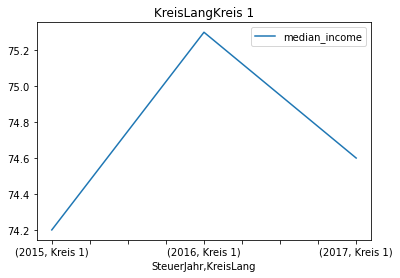

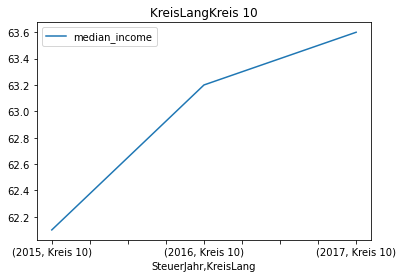

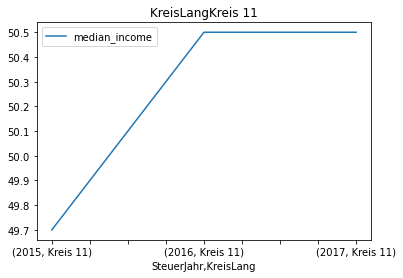

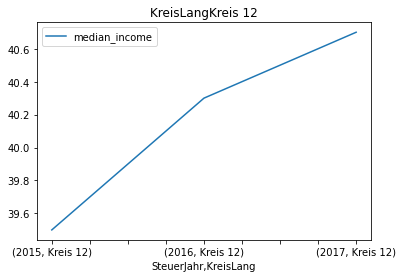

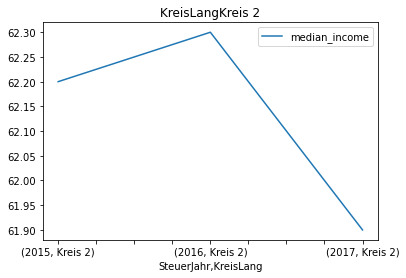

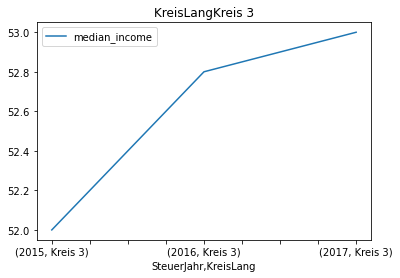

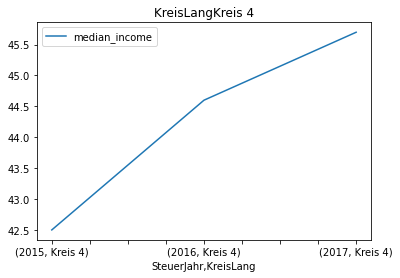

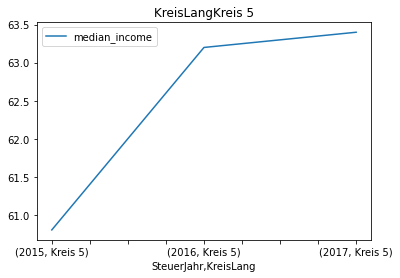

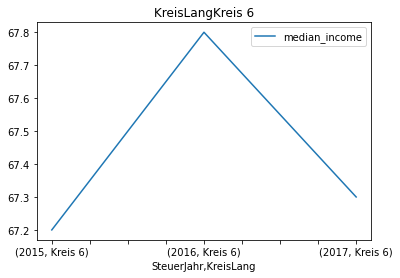

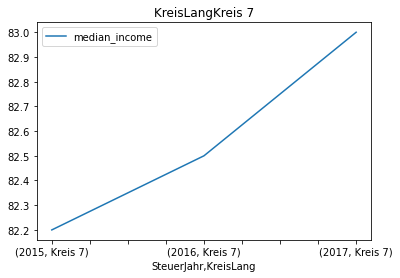

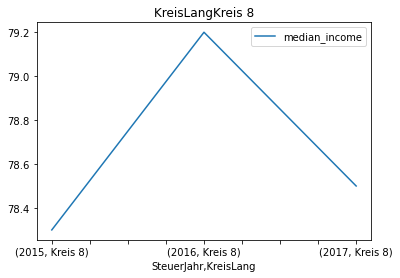

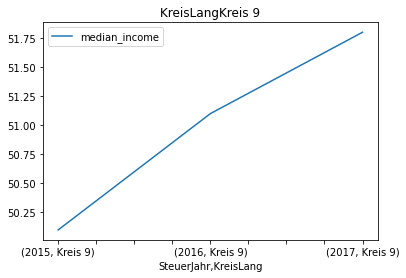

In [157]:
# One plot per Kreis
for kreis in Median_income_by_year_kreis['KreisLang'].unique():
    Median_income_by_kreis_bar_chart = Median_income_by_year_kreis[(Median_income_by_year_kreis['SteuerJahr']>=2015) & (Median_income_by_year_kreis['KreisLang'] == kreis)].set_index(['SteuerJahr', 'KreisLang']).plot.line(y = 'median_income', rot=0, title = ('KreisLang' + str(kreis)))

#### Plot the evolution of thee Total Population Median and 75% percentile Income by Kreis

<AxesSubplot:xlabel='SteuerJahr'>

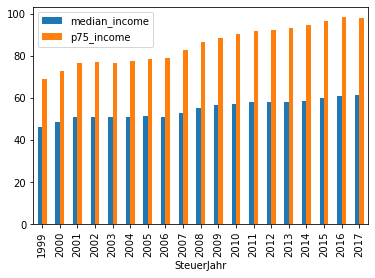

In [159]:
Median_income_by_year = Pop_median_income_by_kreis.groupby(['SteuerJahr']).agg(median_income = ('SteuerEInkommen_p50','mean'), p75_income = ('SteuerEinkommen_p75','mean')).round(1).reset_index(inplace = False)

Median_income_by_year.set_index('SteuerJahr').plot.bar()